In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke

In [22]:
agg_comunas = pd.read_parquet("../data/processed/aggregated_comunas.parquet")
tendencia_ee = pd.read_parquet("../data/processed/tendencia_ee.parquet")

In [23]:
agg_comunas.to_csv("../data/processed/aggregated_comunas.csv")
tendencia_ee.to_csv("../data/processed/tendencia_ee.csv")

In [6]:
agg_comunas.nlargest(10, "total_denuncias").head(1)

,cod_com_rbd,nom_com_rbd,total_establecimientos,total_denuncias,mat_total,denun_100mat
71,13119,MAIPU,2712,4345,997359,0.436191


In [7]:
agg_comunas.nlargest(10, "total_denuncias")["nom_com_rbd"].unique().tolist()

['MAIPU',
 'SANTIAGO',
 'PUENTE ALTO',
 'LA FLORIDA',
 'VINA DEL MAR',
 'PUERTO MONTT',
 'IQUIQUE',
 'TEMUCO',
 'VALPARAISO',
 'LA SERENA']

In [8]:
# The positions for the bars
# This allows us to determine exactly where each bar is located


In [9]:
import matplotlib.font_manager
matplotlib.font_manager.get_font_names()

['DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'cmss10',
 'cmmi10',
 'cmr10',
 'cmb10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'cmex10',
 'STIXSizeThreeSym',
 'DejaVu Sans Display',
 'cmtt10',
 'cmsy10',
 'STIXSizeOneSym',
 'STIXSizeTwoSym']

In [10]:


def pretty_hbar_plot(input_df, value_column, label_column, title,subtitle,caption,autorship,is_decimal=True,font_family = "DejaVu Sans", max_value_multiplier = 1.1, rounder = -2,BAR_COLOR = "#2faae1", LINE_TITLE_COLOR = "#fd7075"):
    y = [i * 0.9 for i in range(len(input_df[label_column].tolist()))]
    max_value = int(input_df[value_column].max())
    BLACK = "#202020"
    GREY = "#a2a2a2"
    fig, ax = plt.subplots(figsize=(12, 7))

    ax.barh(y, input_df[value_column], height=0.55, align="edge", color=BAR_COLOR, );


    if is_decimal:
        ax.xaxis.set_ticks(np.arange(0, max_value * max_value_multiplier, max_value * 0.1))
        ax.xaxis.set_ticklabels([round(i, rounder) for i in np.arange(0, max_value * max_value_multiplier, max_value * 0.1)], size=16, fontfamily=font_family, fontweight=10)
    else:
        ax.xaxis.set_ticks([round(i, rounder)  for i in range(0, int(max_value *max_value_multiplier), int(max_value*0.1))])
        ax.xaxis.set_ticklabels([round(i, rounder)  for i in range(0, int(max_value *max_value_multiplier), int(max_value*0.1))], size=16, fontfamily=font_family, fontweight=10)
    ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)

    ax.set_xlim((0, max_value*max_value_multiplier))
    ax.set_ylim((0, len(input_df[label_column].tolist()) * 0.9 - 0.2))

    # Set whether axis ticks and gridlines are above or below most artists.
    ax.set_axisbelow(True)
    ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_lw(1.5)
    # # This capstyle determines the lines don't go beyond the limit we specified
    # # see: https://matplotlib.org/stable/api/_enums_api.html?highlight=capstyle#matplotlib._enums.CapStyle
    ax.spines["left"].set_capstyle("butt")

    # # Hide y labels
    ax.yaxis.set_visible(False)

    ## ADD LABELS
    PAD = max_value*0.005
    for name, count, y_pos in zip(input_df[label_column].apply(str.title).tolist(), input_df[value_column].to_list(), y):
        x = max_value*0.005
        color = "white"
        path_effects = None
        if count < max_value*0.1:
            x = count
            color = BAR_COLOR
            path_effects=[withStroke(linewidth=6, foreground="white")]

        ax.text(
            x + PAD, y_pos + 0.5 / 2, name,
            color=color, fontfamily=font_family, fontsize=18, va="center",
            path_effects=path_effects
        )

    # Make room on top and bottom
    # Note there's no room on the left and right sides
    fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)

    # Add title
    fig.text(
        0, 0.925, title,
        fontsize=22, fontweight="bold", fontfamily=font_family
    )
    # Add subtitle
    fig.text(
        0, 0.875, subtitle,
        fontsize=20, fontfamily=font_family
    )

    # Add caption
    fig.text(
        0, 0.06, caption, color=GREY,
        fontsize=14, fontfamily=font_family
    )

    # Add authorship
    fig.text(
        0, 0.005, autorship, color=GREY,
        fontsize=16, fontfamily=font_family
    )

    # Add line and rectangle on top.
    fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=LINE_TITLE_COLOR, solid_capstyle="butt"))
    fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=LINE_TITLE_COLOR))

    # Set facecolor, useful when saving as .png
    fig.set_facecolor("white")


# The colors
BAR_COLOR = "#2faae1"
LINE_TITLE_COLOR = "#fd7075"






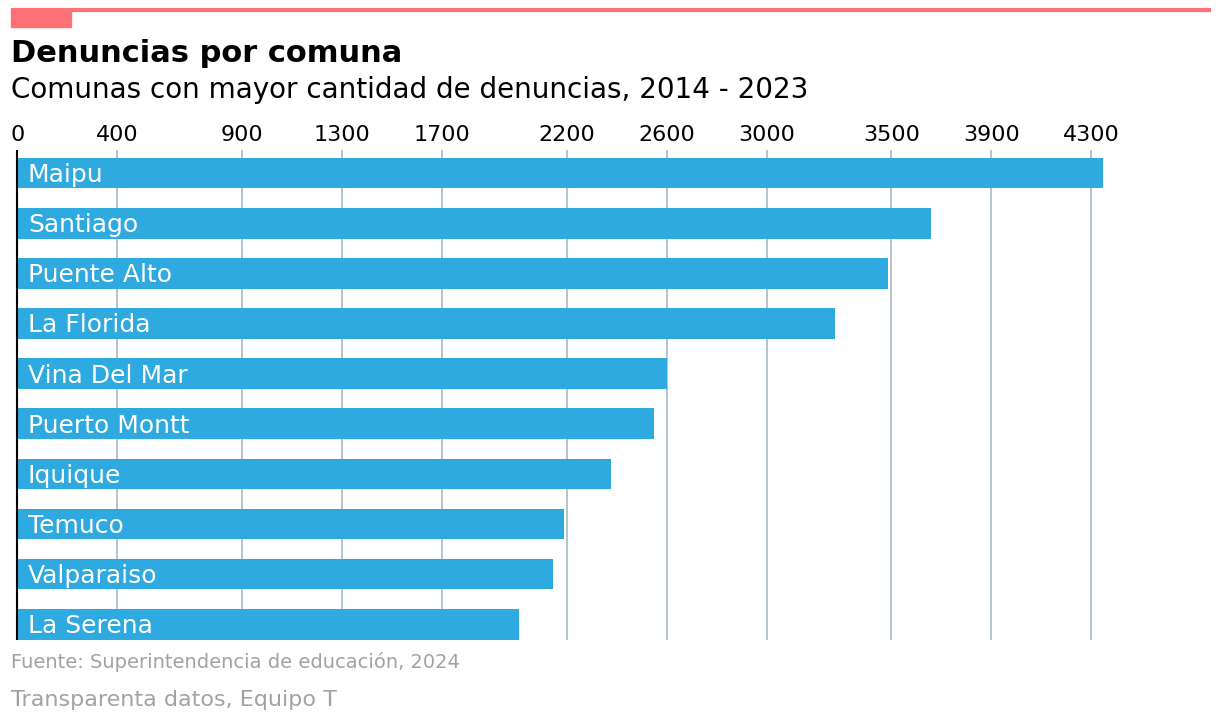

In [11]:

pretty_hbar_plot(agg_comunas.nlargest(10, "total_denuncias").sort_values("total_denuncias", ascending=True), "total_denuncias", "nom_com_rbd", is_decimal=False,title="Denuncias por comuna", subtitle="Comunas con mayor cantidad de denuncias, 2014 - 2023", caption="Fuente: Superintendencia de educación, 2024", autorship="Transparenta datos, Equipo T")

In [12]:
agg_comunas.columns

Index(['cod_com_rbd', 'nom_com_rbd', 'total_establecimientos',
       'total_denuncias', 'mat_total', 'denun_100mat'],
      dtype='object')

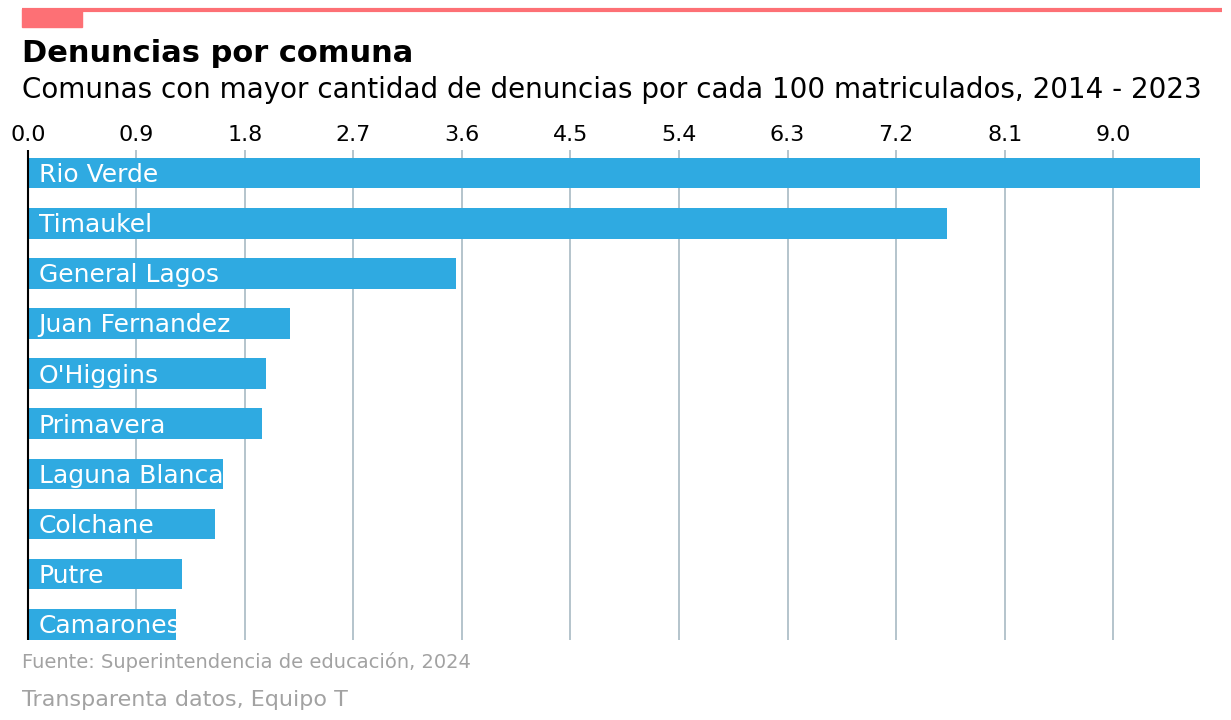

In [13]:
pretty_hbar_plot(agg_comunas.nlargest(10, "denun_100mat").sort_values("denun_100mat", ascending=True), "denun_100mat", "nom_com_rbd", title="Denuncias por comuna", subtitle="Comunas con mayor cantidad de denuncias por cada 100 matriculados, 2014 - 2023", caption="Fuente: Superintendencia de educación, 2024", autorship="Transparenta datos, Equipo T", rounder=2)

In [14]:
tendencia_ee.head()

,rbd,Cambio Promedio,años con denuncias,nom_com_rbd,nom_rbd_x,total_denuncias,mat_total,denun_100mat
0,1,0.444444,0,ARICA,LICEO POLITECNICO ARICA,23,7608,0.281981
1,2,0.000000,0,ARICA,PARVULARIO LAS ESPIGUITAS,2,1889,0.104054
2,3,0.000000,0,ARICA,ESC. PEDRO VICENTE GUTIERREZ TORRES,0,4661,0.000000
3,4,0.555556,0,ARICA,LICEO OCTAVIO PALMA PEREZ,26,10775,0.236354
4,5,0.444444,0,ARICA,JOVINA NARANJO FERNANDEZ,26,8862,0.286982


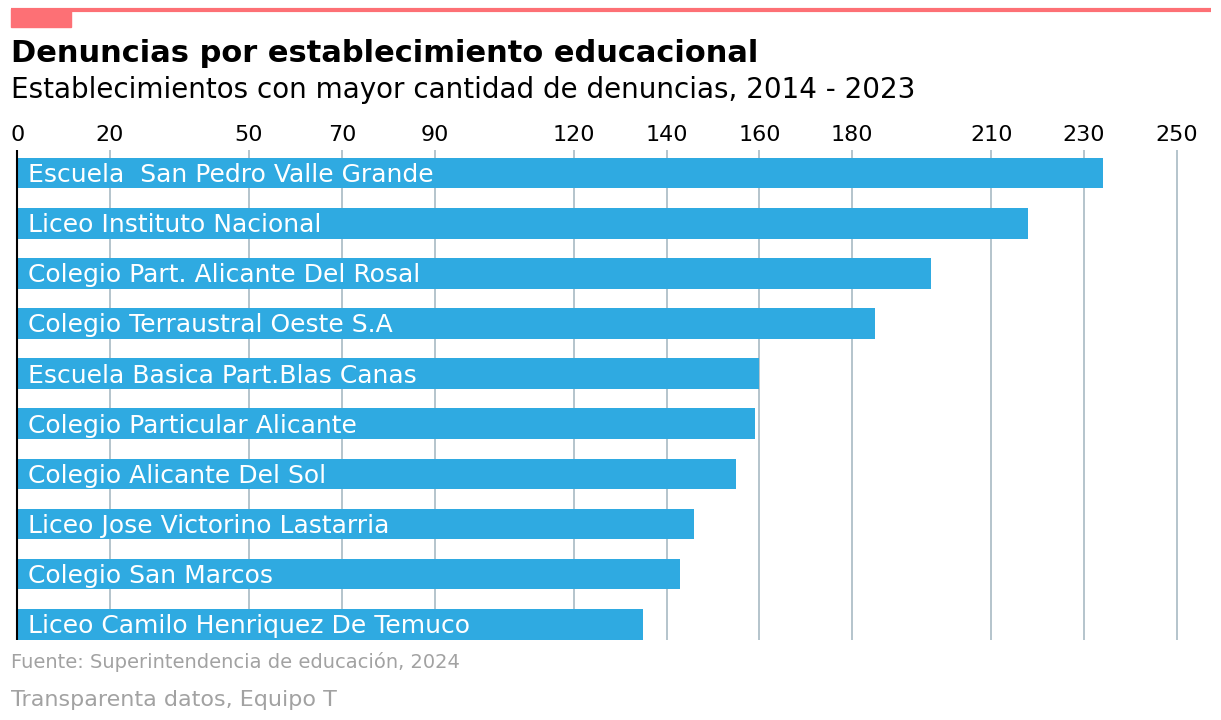

In [15]:
pretty_hbar_plot(tendencia_ee.nlargest(10, "total_denuncias").sort_values("total_denuncias", ascending=True), "total_denuncias", "nom_rbd_x", title="Denuncias por establecimiento educacional", is_decimal=False,subtitle="Establecimientos con mayor cantidad de denuncias, 2014 - 2023", caption="Fuente: Superintendencia de educación, 2024", autorship="Transparenta datos, Equipo T", rounder=-1)

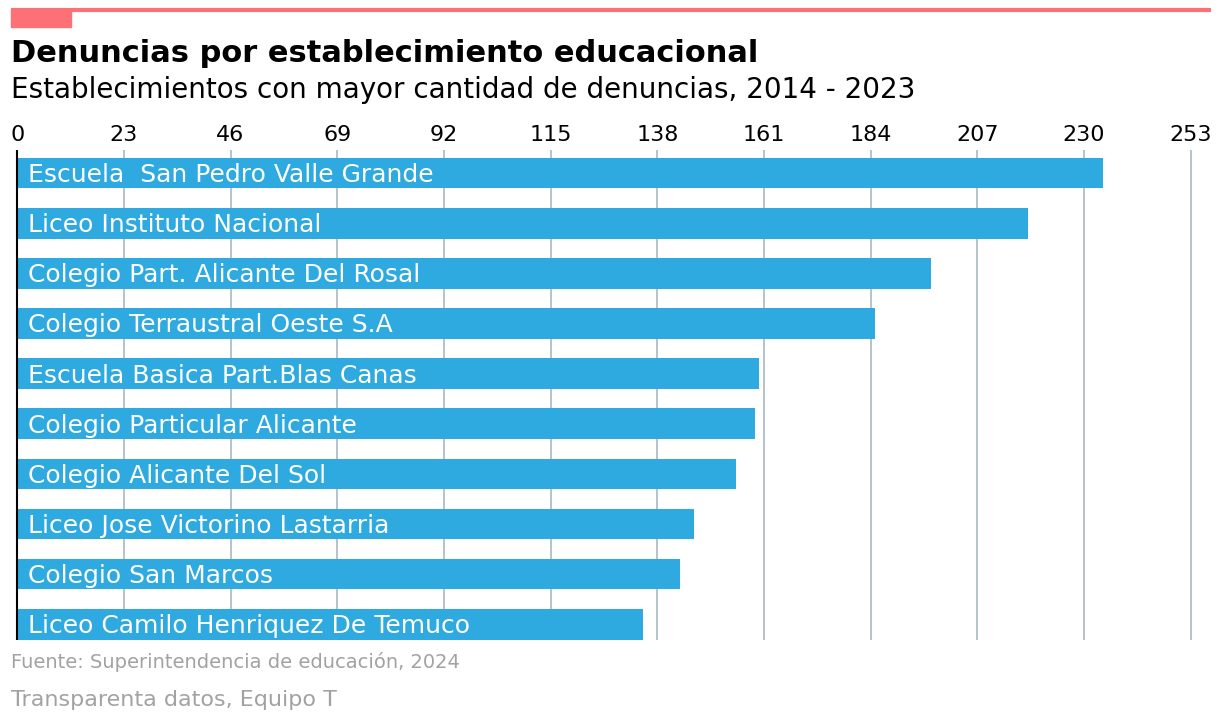

In [16]:
pretty_hbar_plot(tendencia_ee.nlargest(10, "total_denuncias").sort_values("total_denuncias", ascending=True), "total_denuncias", "nom_rbd_x", title="Denuncias por establecimiento educacional", is_decimal=False,subtitle="Establecimientos con mayor cantidad de denuncias, 2014 - 2023", caption="Fuente: Superintendencia de educación, 2024", autorship="Transparenta datos, Equipo T", rounder=2)

In [17]:
tendencia_ee.nlargest(10, "Cambio Promedio")["nom_rbd_x"]

from typing import Literal

from pandas._libs.missing import NAType


def convert_class(  # noqa: PLR0911
    value: str | NAType,
):
    """Change the class of sep."""
    if pd.isna(value):
        return pd.NA
    if isinstance(value, str):
        match value.strip():
            case "ESCUELA BÃSICA N 149 SAN MARCEL":
                return "ESC. BÁS. N149 SAN MARCEL"
            case "COLEGIO PARTICULAR SUBVENCIONADO EDUARDO GALEANO":
                return "COLE. PART. SUBVEN. EDUARDO GALEANO"
            case "ESCUELA PARTICULAR INSTITUTO SN.LUIS":
                return "ESC. PART. INST. SN.LUIS"
            case "ESCUELA BASICA COLEGIO TRIGALES DEL MAIPO":
                return "ESC. BÁS. COL. TRIGALES DEL MAIPO"
            case "LICEO CAMILO HENRIQUEZ DE TEMUCO":
                return "LIC. CAM. HENRIQUEZ DE TEMUCO"
            case "ESCUELA BASICA N°1355 IRARRAZAVAL":
                return "ESC. BAS. N°1355 IRARR."
            case "ESCUELA BASICA NÂ°1355 IRARRAZAVAL":
                return "ESC. BAS. N°1355 IRARR."
            case _:
                return value.strip()
    return pd.NA

tendencia_ee["nom_rbd_x"] = tendencia_ee["nom_rbd_x"].apply(convert_class)

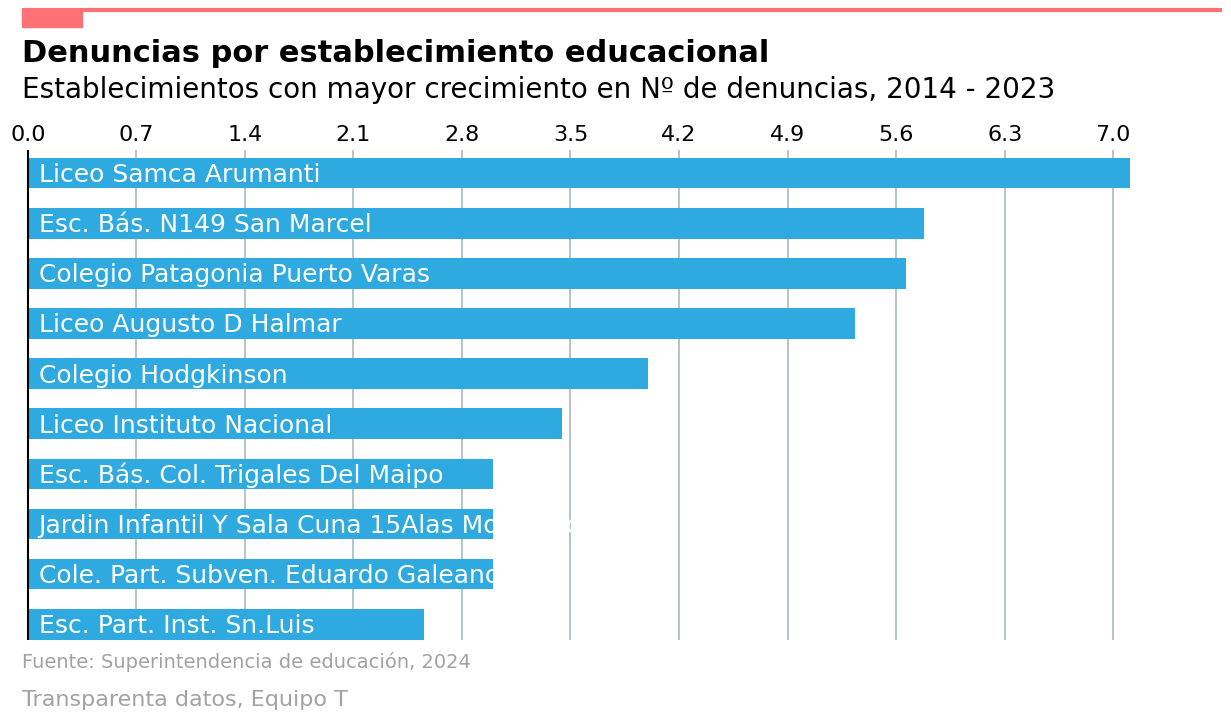

In [18]:




pretty_hbar_plot(tendencia_ee.nlargest(10, "Cambio Promedio").sort_values("Cambio Promedio", ascending=True), "Cambio Promedio", "nom_rbd_x", title="Denuncias por establecimiento educacional", is_decimal=True,subtitle="Establecimientos con mayor crecimiento en Nº de denuncias, 2014 - 2023", caption="Fuente: Superintendencia de educación, 2024", autorship="Transparenta datos, Equipo T", rounder=2, )

In [19]:
tendencia_ee.nlargest(10, "denun_100mat")

,rbd,Cambio Promedio,años con denuncias,nom_com_rbd,nom_rbd_x,total_denuncias,mat_total,denun_100mat
9788,13182,0.000000,0,DIEGO DE ALMAGRO,ESC. DE LENGUAJE CREPONIA,6,225,71.726190
12673,20601,0.166667,0,PUERTO VARAS,COLEGIO TERRAVIDA,24,1704,58.090395
5723,6973,-0.111111,0,LOS LAGOS,ESCUELA PARTICULAR SANTA JIMENA,1,2,50.000000
11428,16771,-0.111111,0,SALAMANCA,JARDIN INFANTIL RENACER,1,2,50.000000
10716,14886,0.000000,0,QUILLOTA,ESCUELA DE PARVULOS LILIPUT,3,28,42.857143
875,1073,0.000000,0,LOS VILOS,ESCUELA PARTICULAR EL RINCON,1,3,33.333333
12617,20473,-0.142857,0,TALCA,COLEGIO SAN BENITO,21,56,32.142857
68,87,0.000000,0,GENERAL LAGOS,ESCUELA ANCOLACANE,3,23,30.000000
2561,3189,0.111111,0,CONSTITUCION,ESCUELA TERESA CONSUELO,5,49,23.539683
9287,12226,-0.111111,0,NUNOA,ESC. BAS. N°1355 IRARR.,11,310,21.225944


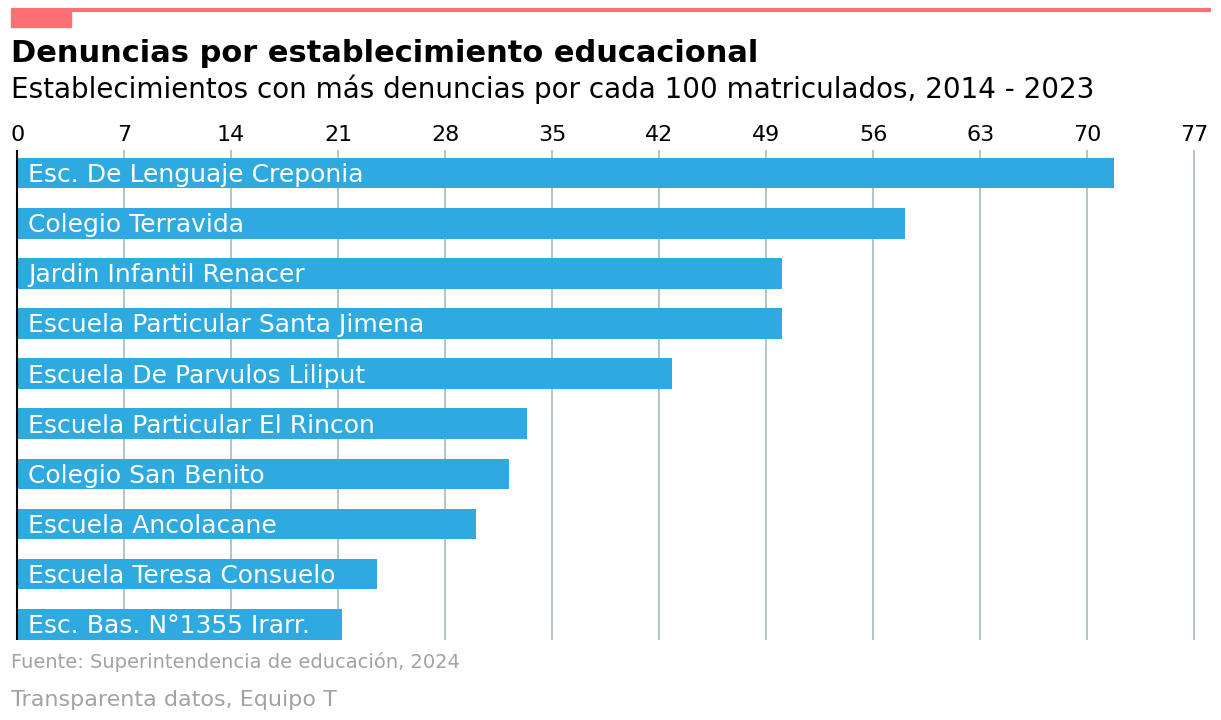

In [20]:

pretty_hbar_plot(tendencia_ee.nlargest(10, "denun_100mat").sort_values("denun_100mat", ascending=True), "denun_100mat", "nom_rbd_x", title="Denuncias por establecimiento educacional", is_decimal=False,subtitle="Establecimientos con más denuncias por cada 100 matriculados, 2014 - 2023", caption="Fuente: Superintendencia de educación, 2024", autorship="Transparenta datos, Equipo T", rounder=2, )

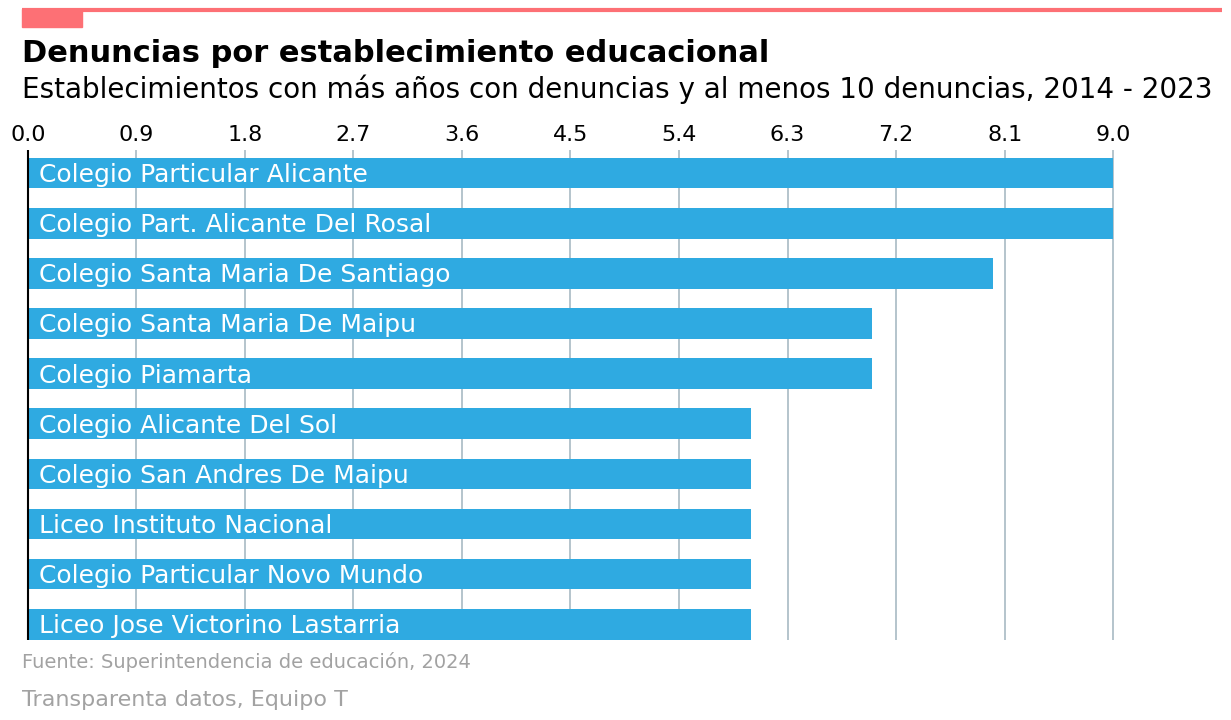

In [21]:
pretty_hbar_plot(tendencia_ee.nlargest(10, "años con denuncias").sort_values("años con denuncias", ascending=True), "años con denuncias", "nom_rbd_x", title="Denuncias por establecimiento educacional", is_decimal=True,subtitle="Establecimientos con más años con denuncias y al menos 10 denuncias, 2014 - 2023", caption="Fuente: Superintendencia de educación, 2024", autorship="Transparenta datos, Equipo T", rounder=2, )